# Network Cycle Basis

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [159]:
import geopandas as gpd

In [288]:
import shapely.ops as ops

In [122]:
from shapely.geometry import Point, LineString, Polygon, MultiLineString

In [73]:
import matplotlib.cm as cm

In [24]:
G = ox.load_graphml('network.graphml')

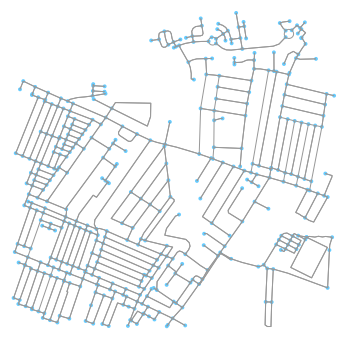

(<Figure size 430.084x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66263b9d90>)

In [25]:
ox.plot_graph(G)

In [5]:
H = nx.Graph(G)
cycles = nx.cycles.cycle_basis(H) 

In [65]:
Gcycles = {}
for i,c in enumerate(cycles):
    Gcycles[i] = G.subgraph(c)

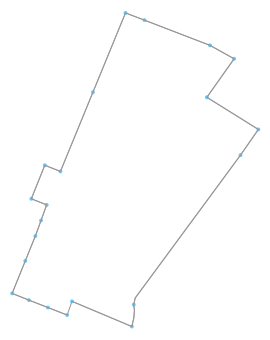

(<Figure size 330.438x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f661c1d30a0>)

In [68]:
ox.plot_graph(Gcycles[5])

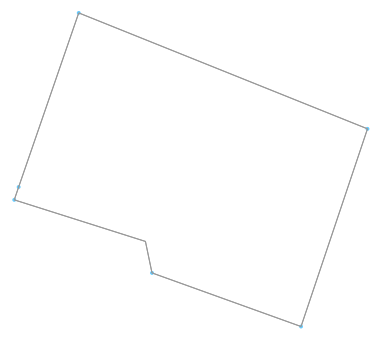

(<Figure size 474.008x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f661bcdf100>)

In [124]:
ox.plot_graph(Gcycles[7])

In [324]:
# get color map
cmap = cm.get_cmap('tab20c', len(Gcycles) + 1)

In [289]:
polygons = []
multilines = []
for i, cycle in enumerate(Gcycles):
    lines = []
    for edge in Gcycles[i].edges:
        e = Gcycles[i].edges[edge]
        try:
            e['geometry']
        except:
            node0, node1 = edge[0], edge[1]
            n0 =  Gcycles[i].nodes[node0]
            n1 =  Gcycles[i].nodes[node1]
            e['geometry'] = LineString([(n0['x'],n0['y']),(n1['x'],n1['y'])])
        lines.append(e['geometry'])
    multiline = MultiLineString(lines)
    multilines.append(multiline)
    polygon = multiline.convex_hull
    polygons.append(polygon)

In [217]:
blocks = gpd.GeoDataFrame(range(len(multilines)), geometry=multilines)

In [220]:
blocks = blocks.reindex(index=blocks.index[::-1])

In [221]:
fig, ax = ox.plot_graph(G,show=False)
blocks.plot(column=0,cmap='tab20b', ax=ax)

<Figure size 432x288 with 0 Axes>

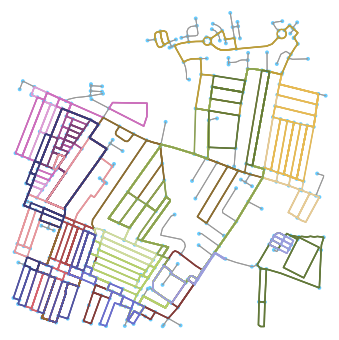

In [222]:
fig

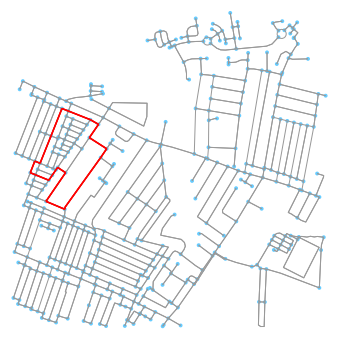

<Figure size 432x288 with 0 Axes>

In [356]:
fig,ax = ox.plot_graph(G,show=False)
x = np.random.randint(len(blocks))
blocks.loc[blocks[0]==x].plot(ax=ax, edgecolor='r')
fig